In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [21]:

global params
params = {
    "m": 730,
    "g": 9.81,
    "S":15
}

In [22]:
df = pd.read_table('../input/excel.txt', sep = "\t")
print(df.columns)
# print(df.dtypes)

p_cz_sam_i = np.polyfit(df['C_x samolot'], df['C_z samolotu'], 20)
p_cz_sam = np.poly1d(p_cz_sam_i)

 


Index(['alpha', 'cz_inter', 'cx_inter', 'cz', 'cx', 'cx' ', 'c'x_p',
       'a_i [deg]', 'a_p [deg]', 'cz_h', 'cx_h', 'cx_szkodliwe', 'C_x samolot',
       'C_z samolotu', 'K', 'E'],
      dtype='object')


c:\Users\marek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## tworzenie modeli do interpolacji 
- $E(C_z)$
- $Cz_{samolotu\;interpolowane}(alpha)$

In [23]:
# tworzenie zinterpolowanego c_z samolotu
cz_inter = np.polyfit(df['alpha'], df['C_z samolotu'], 15)
p_cz_inter = np.poly1d(cz_inter)
df["C_z samolotu inter"] = p_cz_inter(df['alpha'])

# plt.plot(df['alpha'], df["C_z samolotu inter"], color =  'red')
# plt.plot(df['alpha'], df["C_z samolotu"], color =  'black')


# tworzenie zinterpolowanego E
e_inter = np.polyfit(df["C_z samolotu inter"],  df["E"], 15)
p_e_inter = np.poly1d(e_inter)

# plt.plot(df['alpha'])
print("maks cz:",max(df["C_z samolotu inter"]))

maks cz: 1.5790243037217757


## importowanie tabele z projektu 5 z folder sub_tables

In [24]:
import os
rhos = pd.read_table("../input/excel_proj5.txt", sep = ' ')

file_names = os.listdir("../input/sub_tables")
sub_dfs = [pd.read_csv(f"../input/sub_tables/{name}") for name in file_names]
# print(sub_dfs[0].columns)

def get_max_nr(small_df):
    for i, row in small_df.iterrows():
        if row["V"] > 54:
            return row["Nr"]
    
    # max(s_df['Nr'])

height_power_rho = [{"height":float(name.replace("height_", '').replace(".csv", '')), "Nr": get_max_nr(s_df), "rho":rho} for name, s_df, rho in zip(file_names, sub_dfs, rhos['rho(h)'].to_list())]

pprint(height_power_rho)


[{'Nr': 60.05, 'height': 0.0, 'rho': 1.225},
 {'Nr': 55.797, 'height': 0.5, 'rho': 1.167},
 {'Nr': 51.687, 'height': 1.0, 'rho': 1.111},
 {'Nr': 45.927, 'height': 1.5, 'rho': 1.032},
 {'Nr': 44.042, 'height': 2.0, 'rho': 1.006},
 {'Nr': 42.056, 'height': 2.5, 'rho': 1.0},
 {'Nr': 39.289, 'height': 3.0, 'rho': 0.908},
 {'Nr': 35.869, 'height': 3.5, 'rho': 0.863},
 {'Nr': 32.545, 'height': 4.0, 'rho': 0.819},
 {'Nr': 28.714, 'height': 4.5, 'rho': 0.768},
 {'Nr': 26.338, 'height': 5.0, 'rho': 0.736},
 {'Nr': 23.469, 'height': 5.5, 'rho': 0.697}]


In [25]:
# for edf in sub_dfs:
#     display(edf)

## tworzenie funkcji

In [26]:
def v_hor(cz, rho):
    return ( (2*params["m"]*params['g'])/ (rho*params['S']) * 1/cz )**(1/2)

def Nn(rho, E):
    return params["m"]*params['g'] * ( (2*params["m"]*params['g'])/ (rho*params['S']) * 1/E )**(1/2)

def w(Nr, Nn):
    return (Nr-Nn)/(params["m"]*params['g'])

def gamma(w, v):
    return np.arcsin(w/v)

In [27]:
cz_list = np.linspace(0.2, 1.5, 15)

calculated_dfs = []

for pack in height_power_rho:
    
    # print(f"height {pack['height']}")
    
    pack["Nr"] = pack["Nr"]*1000
    
    df_temp = pd.DataFrame()
    df_temp["cz"] = cz_list
    
    df_temp["V"]            = v_hor(df_temp["cz"], pack['rho'])
    df_temp["Nn"]           = Nn(pack['rho'], p_e_inter(df_temp["cz"]))
    df_temp["Nr"]           = pack['Nr']
    df_temp["deltaN"]       =  - df_temp["Nn"] + df_temp["Nr"]
    df_temp["w"]            = w(pack['Nr'], df_temp["Nn"])
    df_temp["gamma"]        = gamma(df_temp["w"], df_temp["V"])
    
    calculated_dfs.append({"height":pack['height'], "df":df_temp})
    # display(df_temp)
    # breakb

display(calculated_dfs[0])

##  Wykresiki

### w(V)

,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,62.428408,112912.646383,60050.0,-52862.646383,-7.381711,-0.118520
1,0.292857,51.590454,66225.771364,60050.0,-6175.771364,-0.862381,-0.016717
2,0.385714,44.953592,47111.330208,60050.0,12938.669792,1.806749,0.040202
3,0.478571,40.357465,37312.010255,60050.0,22737.989745,3.175120,0.078756
4,0.571429,36.933144,31666.368956,60050.0,28383.631044,3.963475,0.107522
5,0.664286,34.254671,28160.291487,60050.0,31889.708513,4.453061,0.130368
6,0.757143,32.085465,25846.617708,60050.0,34203.382292,4.776142,0.149412
7,0.850000,30.282226,24231.346171,60050.0,35818.653829,5.001697,0.165930
8,0.942857,28.752414,23052.212536,60050.0,36997.787464,5.166351,0.180665
9,1.035714,27.433251,22177.994520,60050.0,37872.005480,5.288426,0.193989


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,63.960946,115684.507656,55797.0,-59887.507656,-8.362659,-0.131122
1,0.292857,52.856933,67851.529477,55797.0,-12054.529477,-1.683288,-0.031851
2,0.385714,46.057145,48267.853201,55797.0,7529.146799,1.051366,0.022829
3,0.478571,41.348189,38227.972457,55797.0,17569.027543,2.453329,0.059368
4,0.571429,37.839806,32443.737874,55797.0,23353.262126,3.261037,0.086287
5,0.664286,35.095579,28851.590681,55797.0,26945.409319,3.762642,0.107418
6,0.757143,32.873123,26481.119165,55797.0,29315.880835,4.093654,0.124853
7,0.850000,31.025616,24826.194774,55797.0,30970.805226,4.324746,0.139848
8,0.942857,29.458249,23618.114915,55797.0,32178.885085,4.493442,0.153134
9,1.035714,28.106702,22722.435963,55797.0,33074.564037,4.618514,0.165069


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,65.553106,118564.207060,51687.0,-66877.207060,-9.338696,-0.142946
1,0.292857,54.172685,69540.537046,51687.0,-17853.537046,-2.493058,-0.046037
2,0.385714,47.203631,49469.370249,51687.0,2217.629751,0.309669,0.006560
3,0.478571,42.377457,39179.569795,51687.0,12507.430205,1.746531,0.041225
4,0.571429,38.781741,33251.350013,51687.0,18435.649987,2.574344,0.066429
5,0.664286,35.969203,29569.784588,51687.0,22117.215412,3.088436,0.085969
6,0.757143,33.691423,27140.305643,51687.0,24546.694357,3.427687,0.101914
7,0.850000,31.797927,25444.185720,51687.0,26242.814280,3.664532,0.115501
8,0.942857,30.191544,24206.033495,51687.0,27480.966505,3.837427,0.127447
9,1.035714,28.806354,23288.058678,51687.0,28398.941322,3.965613,0.138103


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,68.015901,123018.600482,45927.0,-77091.600482,-10.765029,-0.158941
1,0.292857,56.207924,72153.137580,45927.0,-26226.137580,-3.662203,-0.065201
2,0.385714,48.977046,51327.907854,45927.0,-5400.907854,-0.754180,-0.015399
3,0.478571,43.969555,40651.525137,45927.0,5275.474863,0.736664,0.016755
4,0.571429,40.238750,34500.585330,45927.0,11426.414670,1.595578,0.039663
5,0.664286,37.320547,30680.705474,45927.0,15246.294526,2.128984,0.057077
6,0.757143,34.957192,28159.952313,45927.0,17767.047687,2.480981,0.071032
7,0.850000,32.992558,26400.110078,45927.0,19526.889922,2.726724,0.082741
8,0.942857,31.325824,25115.441140,45927.0,20811.558860,2.906115,0.092904
9,1.035714,29.888593,24162.978503,45927.0,21764.021497,3.039116,0.101858


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,68.889227,124598.163248,44042.0,-80556.163248,-11.248818,-0.164023
1,0.292857,56.929635,73079.586176,44042.0,-29037.586176,-4.054793,-0.071285
2,0.385714,49.605913,51986.959833,44042.0,-7944.959833,-1.109430,-0.022367
3,0.478571,44.534125,41173.492021,44042.0,2868.507979,0.400557,0.008995
4,0.571429,40.755417,34943.573949,44042.0,9098.426051,1.270499,0.031179
5,0.664286,37.799744,31074.646714,44042.0,12967.353286,1.810754,0.047922
6,0.757143,35.406043,28521.527001,44042.0,15520.472999,2.167270,0.061250
7,0.850000,33.416184,26739.088336,44042.0,17302.911664,2.416169,0.072369
8,0.942857,31.728049,25437.924208,44042.0,18604.075792,2.597863,0.081971
9,1.035714,30.272363,24473.231921,44042.0,19568.768079,2.732572,0.090389


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,69.095586,124971.398722,42056.0,-82915.398722,-11.578261,-0.168363
1,0.292857,57.100169,73298.497059,42056.0,-31242.497059,-4.362685,-0.076479
2,0.385714,49.754508,52142.687470,42056.0,-10086.687470,-1.408500,-0.028313
3,0.478571,44.667528,41296.827770,42056.0,759.172230,0.106010,0.002373
4,0.571429,40.877500,35048.247895,42056.0,7007.752105,0.978559,0.023941
5,0.664286,37.912973,31167.731236,42056.0,10888.268764,1.520432,0.040114
6,0.757143,35.512103,28606.963619,42056.0,13449.036381,1.878016,0.052909
7,0.850000,33.516282,26819.185635,42056.0,15236.814365,2.127660,0.063524
8,0.942857,31.823091,25514.123852,42056.0,16541.876148,2.309899,0.072650
9,1.035714,30.363045,24546.541816,42056.0,17509.458184,2.445011,0.080613


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,72.511582,131149.822262,39289.0,-91860.822262,-12.827395,-0.177837
1,0.292857,59.923127,76922.279495,39289.0,-37633.279495,-5.255090,-0.087810
2,0.385714,52.214307,54720.554174,39289.0,-15431.554174,-2.154854,-0.041281
3,0.478571,46.875833,43338.489266,39289.0,-4049.489266,-0.565468,-0.012063
4,0.571429,42.898430,36780.987722,39289.0,2508.012278,0.350217,0.008164
5,0.664286,39.787341,32708.623363,39289.0,6580.376637,0.918880,0.023097
6,0.757143,37.267775,30021.254723,39289.0,9267.745277,1.294143,0.034733
7,0.850000,35.173284,28145.091319,39289.0,11143.908681,1.556129,0.044256
8,0.942857,33.396383,26775.508977,39289.0,12513.491023,1.747377,0.052346
9,1.035714,31.864154,25760.090943,39289.0,13528.909057,1.889169,0.059323


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,74.378070,134525.691389,35869.0,-98656.691389,-13.776366,-0.186297
1,0.292857,61.465581,78902.301610,35869.0,-43033.301610,-6.009147,-0.097921
2,0.385714,53.558332,56129.091573,35869.0,-20260.091573,-2.829108,-0.052848
3,0.478571,48.082442,44454.046004,35869.0,-8585.046004,-1.198811,-0.024935
4,0.571429,44.002660,37727.750735,35869.0,-1858.750735,-0.259555,-0.005899
5,0.664286,40.811490,33550.561460,35869.0,2318.438540,0.323745,0.007933
6,0.757143,38.227068,30794.018461,35869.0,5074.981539,0.708668,0.018539
7,0.850000,36.078664,28869.561571,35869.0,6999.438429,0.977398,0.027094
8,0.942857,34.256024,27464.725421,35869.0,8404.274579,1.173568,0.034265
9,1.035714,32.684355,26423.169963,35869.0,9445.830037,1.319011,0.040367


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,76.349879,138092.050923,32545.0,-105547.050923,-14.738532,-0.194259
1,0.292857,63.095072,80994.050574,32545.0,-48449.050574,-6.765399,-0.107432
2,0.385714,54.978196,57617.108611,32545.0,-25072.108611,-3.501055,-0.063724
3,0.478571,49.357138,45632.550341,32545.0,-13087.550341,-1.827538,-0.037035
4,0.571429,45.169198,38727.936812,32545.0,-6182.936812,-0.863382,-0.019116
5,0.664286,41.893428,34440.007658,32545.0,-1895.007658,-0.264618,-0.006316
6,0.757143,39.240491,31610.386994,32545.0,934.613006,0.130509,0.003326
7,0.850000,37.035131,29634.911558,32545.0,2910.088442,0.406363,0.010973
8,0.942857,35.164173,28192.832330,32545.0,4352.167670,0.607734,0.017284
9,1.035714,33.550838,27123.664591,32545.0,5421.335409,0.757032,0.022566


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,78.844190,142603.446090,28714.0,-113889.446090,-15.903460,-0.203101
1,0.292857,65.156355,83640.083897,28714.0,-54926.083897,-7.669848,-0.117988
2,0.385714,56.774305,59499.429451,28714.0,-30785.429451,-4.298860,-0.075791
3,0.478571,50.969610,47123.341923,28714.0,-18409.341923,-2.570670,-0.050457
4,0.571429,46.644852,39993.158277,28714.0,-11279.158277,-1.575015,-0.033773
5,0.664286,43.262064,35565.144717,28714.0,-6851.144717,-0.956690,-0.022116
6,0.757143,40.522458,32643.081825,28714.0,-3929.081825,-0.548655,-0.013540
7,0.850000,38.245050,30603.068638,28714.0,-1889.068638,-0.263789,-0.006897
8,0.942857,36.312968,29113.877435,28714.0,-399.877435,-0.055839,-0.001538
9,1.035714,34.646926,28009.780544,28714.0,704.219456,0.098337,0.002838


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,80.539958,145670.537751,26338.0,-119332.537751,-16.663530,-0.208403
1,0.292857,66.557727,85439.001180,26338.0,-59101.001180,-8.252831,-0.124315
2,0.385714,57.995398,60779.133476,26338.0,-34441.133476,-4.809341,-0.083022
3,0.478571,52.065856,48136.863076,26338.0,-21798.863076,-3.043981,-0.058497
4,0.571429,47.648082,40853.324603,26338.0,-14515.324603,-2.026912,-0.042552
5,0.664286,44.192537,36330.074049,26338.0,-9992.074049,-1.395288,-0.031578
6,0.757143,41.394008,33345.163905,26338.0,-7007.163905,-0.978477,-0.023640
7,0.850000,39.067618,31261.274447,26338.0,-4923.274447,-0.687483,-0.017598
8,0.942857,37.093981,29740.053963,26338.0,-3402.053963,-0.475061,-0.012807
9,1.035714,35.392106,28612.210336,26338.0,-2274.210336,-0.317569,-0.008973


,cz,V,Nn,Nr,deltaN,w,gamma
0,0.200000,82.762560,149690.500876,23469.0,-126221.500876,-17.625501,-0.214608
1,0.292857,68.394472,87796.798711,23469.0,-64327.798711,-8.982698,-0.131717
2,0.385714,59.595854,62456.410701,23469.0,-38987.410701,-5.444181,-0.091479
3,0.478571,53.502679,49465.260825,23469.0,-25996.260825,-3.630104,-0.067901
4,0.571429,48.962991,41980.723876,23469.0,-18511.723876,-2.584967,-0.052819
5,0.664286,45.412087,37332.648491,23469.0,-13863.648491,-1.935912,-0.042643
6,0.757143,42.536328,34265.365967,23469.0,-10796.365967,-1.507599,-0.035450
7,0.850000,40.145738,32123.968939,23469.0,-8654.968939,-1.208575,-0.030109
8,0.942857,38.117637,30560.768447,23469.0,-7091.768447,-0.990291,-0.025983
9,1.035714,36.368796,29401.800546,23469.0,-5932.800546,-0.828453,-0.022781


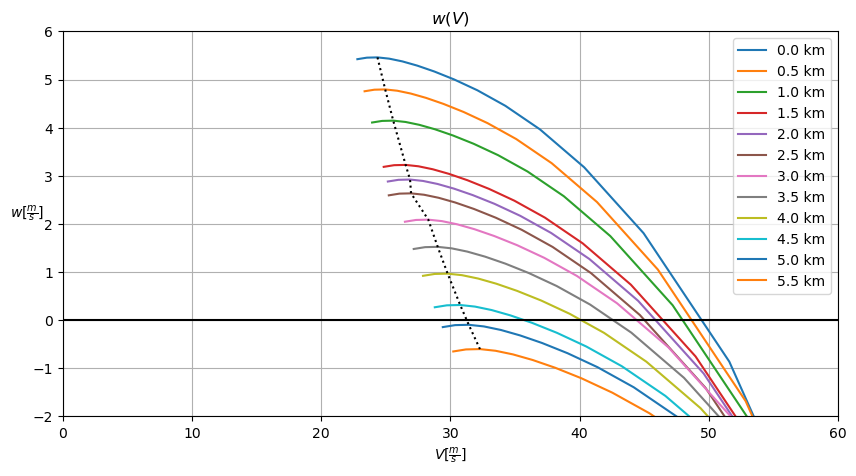

In [81]:
fig, ax = plt.subplots(figsize = (10, 5))

w_maxes, v_maxes = [], []
heights, v_gamma = [], []
gamma_max = []

v_max_i, v_min_i = [],[]

out = open("../output/latex_tables.txt", "w")

for el in calculated_dfs:
    sdf = el['df']
    # print(sdf.columns)
    tempo = sdf[['V', 'gamma']]
    
    # v_gamma_temp = sdf[sdf['gamma'] == max(sdf['gamma'])]
    # v_gamma.append(v_gamma_temp)
    heights.append(el['height'])

    
    # print(el["height"])
    # display(tempo)
    
    display(sdf)
    temp_p = np.polyfit(sdf['w'], sdf["V"], 4)
    p_temp_p = np.poly1d(temp_p)
    
    
    # fig,ax = plt.subplots()
    # ax.plot(sdf['w'], sdf["V"])
    # w_i = np.arange(0, 5, 10)
    # ax.plot(w_i, p_temp_p(w_i))
    
    # print(p_temp_p(0))
    # print(p_temp_p(max(sdf['w'])))
    
        
    v_max_i.append(p_temp_p(0))
    v_min_i.append(p_temp_p(max(sdf['w'])))
    
    for i, row in sdf.iterrows():
        if row['w'] == max(sdf['w']):
            w_maxes.append(max(sdf['w']))
            v_maxes.append(row["V"])
            # v_min_i.append(row["V"])

        if row['gamma'] == max(sdf['gamma']):
            v_gamma.append(row['V'])
    
    gamma_max.append(max(sdf['gamma']))
    
    ax.plot(sdf["V"], sdf['w'], label = f"{el['height']} km" )
    
    latexowe = sdf.style.set_table_styles(
        [
            {"selector": "toprule", "props": ":hline;"},
            {"selector": "midrule", "props": ":hline;"},
            {"selector": "bottomrule", "props": ":hline;"},
        ]    
    ).format(precision = 3).to_latex(
            caption= f"Wysokość {el['height']} km",
             multicol_align='r',
            position="h", 
            position_float="centering"
    )
    
    
    latexowe = latexowe.replace(
        " & cz & V & Nn & Nr & deltaN & w & gamma \\", 
        " & $C_z$ & $V$ & $N_n$ & $N_r$ & $\Delta N$ & $w$ & $\gamma$ \\"
    ).replace(
        "\\begin{tabular}{lrrrrrrr}",
        "\\begin{tabular}{|l|r|r|r|r|r|r|r|}"
    )
    
    out.write(latexowe + "\FloatBarrier\n")
    # break

out.close()


p_w_max_i = np.polyfit(v_maxes, w_maxes, 1)
p_w_max = np.poly1d(p_w_max_i)
# v_maxes = np.arange(22, 35, 15)

ax.plot(v_maxes, w_maxes, c = 'black', linestyle = 'dotted')

# ax.plot(v_maxes, p_w_max(v_maxes), c = 'black', linestyle = 'dotted')
ax.plot([0, 60], [0,0], color = 'black')

ax.plot()
ax.set_xlim([0, 60])
ax.set_ylim([-2, 6])

ax.set_title("$w(V)$")
ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("$w [\\frac{m}{s}]$", rotation = 0)

ax.grid(True)
ax.legend()

plt.savefig("../output/w_V.jpg", dpi = 200)


### gamma(V)

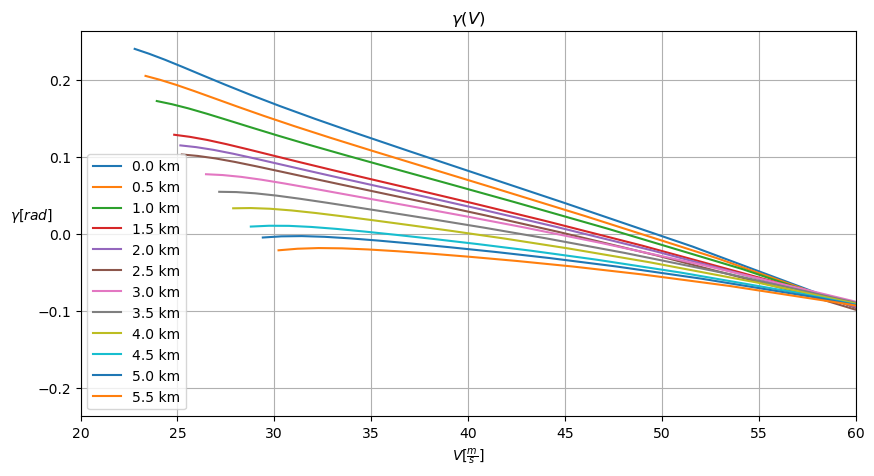

In [29]:
fig, ax = plt.subplots(figsize = (10, 5))

for el in calculated_dfs:
    sdf = el['df']
    
    ax.plot(sdf["V"], sdf['gamma'], label = f"{el['height']} km" )

ax.legend()

# ax.set_xlim([0, 50])

ax.set_title("$ \\gamma (V)$")
ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("$\\gamma [rad]$", rotation = 0)
ax.set_xlim([20, 60])

ax.grid(True)
ax.legend()

plt.savefig("../output/gamma_V.jpg", dpi = 200)

### wmax(h)

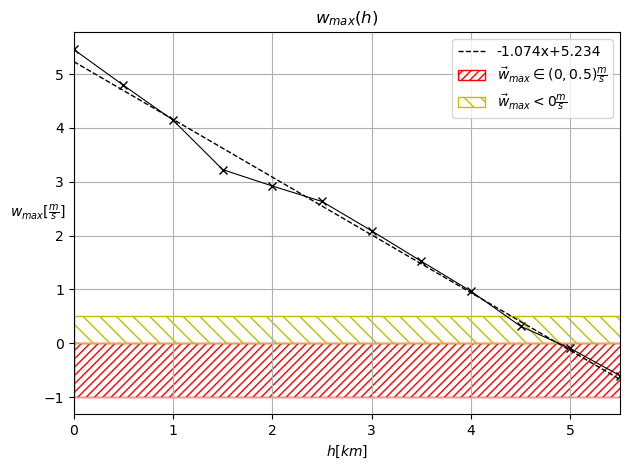

In [30]:
# w_max(h)
fig, ax = plt.subplots()

wmaxs = [max(el['df']["w"]) for el in calculated_dfs]
heights = [el['height'] for el in calculated_dfs]

p_wmax_fit = np.polyfit(heights, wmaxs, 1)
p_wmax = np.poly1d(p_wmax_fit)


ax.plot(heights, wmaxs, color = 'black', marker = 'x', linewidth = 0.8)
ax.plot(heights, p_wmax(heights), label = f'{"x+".join([str(round(i, 3)) for i in p_wmax.coef])}', color = 'black', linestyle = 'dashed', linewidth = 1)
# ax.plot(heights, [0 for i in range(len(heights))], color = 'black', linestyle = 'dashdot')
ax.fill_between([0, 7], [-1, -1], color = 'none', hatch = '////',  edgecolor="r", label = '$\\vec w_{max} \\in (0, 0.5) \\frac{m}{s}$')
ax.fill_between([0, 7], [0.5, 0.5], color = 'none', hatch = '\\\\',  edgecolor="y", label = '$\\vec w_{max} < 0 \\frac{m}{s}$')


ax.set_title("$w_{max}(h)$")
ax.set_xlabel("$h[km]$")
ax.set_ylabel("$w_{max} [\\frac{m}{s}]$", rotation = 0)
ax.set_xlim([0, 5.5])
ax.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("../output/wmax.jpg", dpi = 200)


### Dodatkowy wykres długości czasu wznoszenia

## Wykres ofertowy

In [31]:
import math

#t_h
ht = 4.3*1000

# print(math.log(1/(1-/ht)))
print(heights)

th = [ht/w * math.log(1/(1-(h*1000/ht)))/900 for w, h in zip(w_maxes[:-3], heights[:-3])]

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]


In [67]:
dict = {
    "height":   heights,
    "Vmin":     v_min_i,
    "Vmax":     v_max_i,
    "Vgamma":   v_gamma,
    "wmax":     w_maxes,
    "gamma":    gamma_max
}

ofertowy = pd.DataFrame(dict)
ofertowy = ofertowy.round(3)

ofertowy.to_clipboard()


display(ofertowy)

,height,Vmin,Vmax,Vgamma,wmax,gamma
0,0.0,24.417,48.669,22.796,5.459,0.240
1,0.5,25.016,47.718,23.355,4.794,0.205
2,1.0,25.639,47.236,23.937,4.145,0.172
3,1.5,26.602,46.706,24.836,3.225,0.129
4,2.0,26.944,46.411,25.155,2.921,0.115
5,2.5,27.025,45.667,25.230,2.634,0.103
6,3.0,28.361,45.335,26.477,2.088,0.077
7,3.5,29.091,43.193,27.159,1.523,0.054
8,4.0,29.862,40.010,28.784,0.966,0.033
9,4.5,30.837,34.640,29.725,0.314,0.010


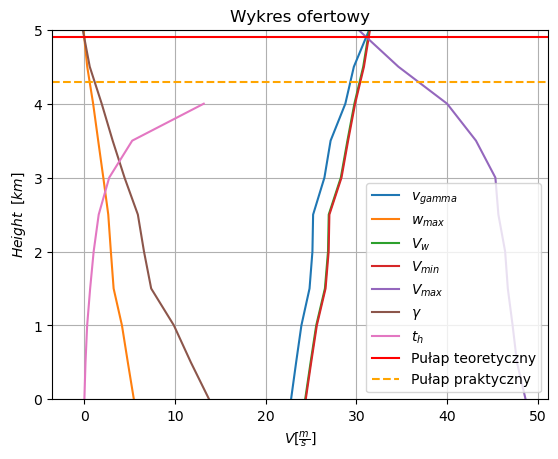

In [72]:
fig,ax = plt.subplots()

ax.plot(v_gamma, heights, label = "$v_{gamma}$")

ax.plot(w_maxes, heights, label = "$w_{max}$")

ax.plot(v_maxes, heights, label = "$V_{w}$")

ax.plot(v_min_i, heights, label = "$V_{min}$")

ax.plot(v_max_i, heights, label = "$V_{max}$")

ax.plot([i*180/3.1415 for i in gamma_max ], heights, label = '$\\gamma$')

ax.plot(th, heights[:-3], label = '$t_h$')

ax.axhline(4.9, color = "red", label = "Pułap teoretyczny")
ax.axhline(4.3, color = "orange", linestyle = 'dashed', label = "Pułap praktyczny")

ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("$Height\;\;[km]$")

ax.set_ylim([0, 5])

ax.grid()
ax.legend()
ax.set_title("Wykres ofertowy")

plt.savefig("../output/wykres_ofertowy.png", dpi = 200)


plt.show()

## Zasięg i długotrwałość lotu

Masa samolotu:
- m = 650 kg
- Moc nominalna na h = 0, Nn = 64
- Masa Paliwa mf = 80kg 
- jednoskowe zużycie paliwa bj= 0.3148
- gestość powietrza 
- paliwo na start i lądowanie $\Delta m = 16.05 kg$

In [33]:
char = pd.read_table('../input/char_samolotu.txt', sep = '\t')
print(char.columns)


p_samolot_V_cx_i = np.polyfit(char["cx"], char["V_2"], 5)
p_samolot_V_cx = np.poly1d(p_samolot_V_cx_i)
#bierzemy w2

Index(['Cz', 'cx', 'theta_1', 'theta_2', 'gamma', 'V_1', 'w_1', 'V_2', 'w_2',
       'V_3', 'w_3'],
      dtype='object')


In [34]:
def A(V):
    rho = 1.225
    s = 15
    lambda_e = 4.8449
    
    return rho* s*V**2 *(0.05 * math.pi * lambda_e)**(1/2)

def L(v,t):
    return 3.6 * v*t

def T(V, A, eta_s):
    # eta_s = 0.753
    g = 9.81
    rho = 1.225
    s = 15
    lambda_e = 4.8449
    cx0 = 0.05
    qe = 0.34713
    m = 700
    
    return 1000*eta_s/(g* V * qe) * (lambda_e * math.pi/cx0)**(1/2) * (math.atan(2*g*m/A) - math.atan(2*g*(m-60-16)/ A))

In [49]:
# interpolacja eta_s(V) dla h = 0
eta_df = pd.read_csv("../input/sub_tables/height_0.0.csv")
print(eta_df.columns)

# plt.plot(eta_df['V'], eta_df['eta'])

eta_V_i = np.polyfit(eta_df['V'], eta_df['eta'], 4)
p_eta_v = np.poly1d(eta_V_i)

# plt.plot(eta_df["V"], p_eta_v(eta_df['V']))


Index(['Unnamed: 0', 'J', 'Cn', 'eta', 'ns', 'V', 'N', 'Nr'], dtype='object')


In [38]:



zasiegi = pd.DataFrame()
zasiegi["cx"]       = np.linspace(0.05, 0.201, 20)
# zasiegi["cz"]       = p_cz_sam(zasiegi["cx"])
zasiegi["V"]        = p_samolot_V_cx(zasiegi['cx'])
zasiegi["A"]        = A(zasiegi["V"])
zasiegi['eta_s']    = p_eta_v(zasiegi["V"])

for i, row in zasiegi.iterrows():
    
    flight_duration = T(row["V"], row['A'], row['eta_s'])
    
    zasiegi.loc[i, "flight_duration"]   = flight_duration
    zasiegi.loc[i, "range"]             = L(flight_duration, row['V'])   


duration = round(max(zasiegi['flight_duration']),3)
range = round(max(zasiegi['range']),3)


print(f"Maksymalny czas lotu: \t{duration}\t [h]")
print(f"Maksymalny zasięg: \t{range} [km]")

display(zasiegi)

# plt.plot(zasiegi["cx"])


Maksymalny czas lotu: 	6.42	 [h]
Maksymalny zasięg: 	681.1 [km]


,cx,V,A,eta_s,flight_duration,range
0,0.050000,66.937398,71823.629124,0.851020,1.306942,314.939937
1,0.057947,51.134091,41913.195848,0.821159,2.656275,488.974386
2,0.065895,40.750549,26619.299192,0.761053,4.278686,627.691752
3,0.073842,34.401968,18971.263766,0.703448,5.499521,681.099634
4,0.081789,30.930685,15335.882890,0.664051,6.074325,676.378908
5,0.089737,29.388076,13844.331773,0.644581,6.260763,662.370427
6,0.097684,29.016445,13496.404841,0.639703,6.296612,657.739074
7,0.105632,29.230927,13696.665743,0.642527,6.276395,660.473393
8,0.113579,29.601378,14046.029204,0.647348,6.238474,664.802725
9,0.121526,29.834278,14267.923171,0.650342,6.212773,667.272918


In [68]:
to_latex = zasiegi.round(3)
to_latex.to_clipboard()

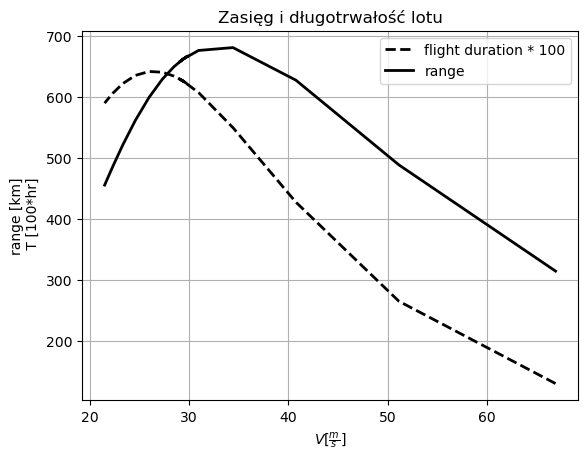

In [47]:
fig, ax = plt.subplots()
ax.plot(zasiegi["V"], zasiegi["flight_duration"]*100, label = "flight duration * 100", linestyle = 'dashed', color = 'black', linewidth = 2)
ax.plot(zasiegi["V"], zasiegi["range"], label = 'range', linestyle = 'solid', color = 'black', linewidth = 2)

ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("range [km]\n T [100*hr]")
ax.set_title("Zasięg i długotrwałość lotu")

ax.grid(True)
ax.legend()

plt.savefig("../output/zasieg_dlugosc_lotu.png", dpi=200)
